In [1]:
import os

## switch to the root dir

In [2]:
os.chdir('..')
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'models',
 'original_data',
 'processed_data',
 'README.md',
 'saved_models',
 'trainers']

In [3]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.Linear import LogisticRegression
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn

## Load preprocessed data

In [4]:
X_train, y_train, X_val, y_val = load_numpy_arrays(['data_train_X.npy','data_train_y.npy', 'data_val_X.npy','data_val_y.npy']
                  , path_prefix='processed_data/processed_waves/4-genres/')

In [5]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [6]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [7]:
print(X_train.shape)
print(y_train.shape)

torch.Size([640, 501, 20])
torch.Size([640])


In [8]:
# example on 1_D neural network
X_train = X_train.reshape((-1, 10020))
X_val = X_val.reshape((-1, 10020))

In [9]:
print(X_train[0])
print(y_train[0])

tensor([-2.6793, -3.5519, -4.7389,  ..., -0.2389, -0.2379, -0.1873])
tensor(1)


In [10]:
print(X_val.shape)
print(y_val.shape)

torch.Size([80, 10020])
torch.Size([80])


## Load model

1. define model under the folder models
2. import and define the model

In [11]:
#define model here
# for example
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 200),
            nn.ReLU(),
            nn.Linear(200, output_dim)
        )
        
    def forward(self, x):
        x = self.layers(x)
        return x

In [12]:
# eg. MLP

model = MLP(10020, 4)

## Define loss and optimizer

In [13]:
lr = 0.05
batch_size = 100
num_epoch = 10
model_name = 'MLP'
saved_model_name = 'saved_models/saved_' + model_name + '_wave.pt'

In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [15]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train, y_train, X_val, y_val), 
                                                                                                                            loss, optimizer, batch_size=batch_size, num_epoch=num_epoch)

Epoch  0: loss on final training batch: 761.1539
training accuracy: 46.56% validation accuracy: 40.00%
Epoch  1: loss on final training batch: 207.3964
training accuracy: 54.84% validation accuracy: 50.00%
Epoch  2: loss on final training batch: 325.6795
training accuracy: 66.09% validation accuracy: 61.25%
Epoch  3: loss on final training batch: 182.7167
training accuracy: 68.91% validation accuracy: 57.50%
Epoch  4: loss on final training batch: 322.8436
training accuracy: 72.66% validation accuracy: 66.25%
Epoch  5: loss on final training batch: 52.0305
training accuracy: 78.12% validation accuracy: 57.50%
Epoch  6: loss on final training batch: 63.0533
training accuracy: 71.09% validation accuracy: 53.75%
Epoch  7: loss on final training batch: 28.0966
training accuracy: 76.72% validation accuracy: 60.00%
Epoch  8: loss on final training batch: 32.7877
training accuracy: 77.97% validation accuracy: 52.50%
Epoch  9: loss on final training batch: 3.3401
training accuracy: 82.97% vali

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

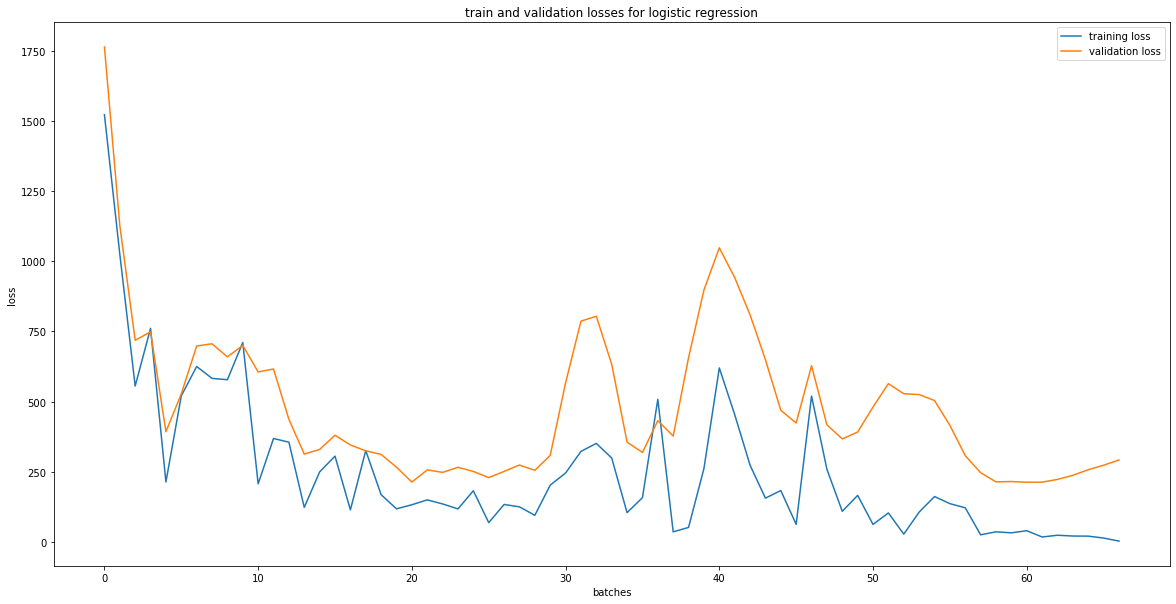

In [16]:
plot_numerical_arrays([training_loss_array[3:], validation_loss_array[3:]], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

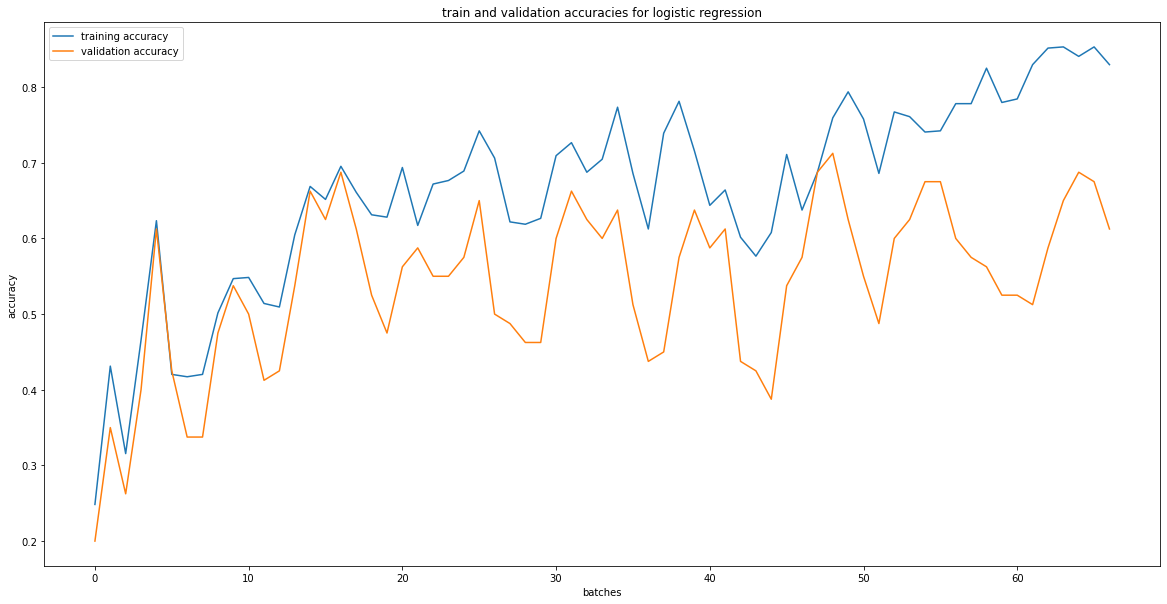

In [17]:
plot_numerical_arrays([training_accuracy_array[3:], validation_accuracy_array[3:]], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for ' + model_name)

## Save model

Save model in 'saved_models/saved_modelname_wave.pt'

In [18]:
torch.save(model.state_dict(), saved_model_name)

In [19]:
from loggers.trainer_loggers import cal_accuracy

In [20]:
X_test, y_test = load_numpy_arrays(['data_test_X.npy','data_test_y.npy']
                  , path_prefix='processed_data/processed_waves/4-genres/')
X_test, y_test = numpy_to_tensor([X_test, y_test])
X_test = X_test.reshape((-1, 10020))
print('testing accuracy: %.2f%%' % (cal_accuracy(model, X_test, y_test) * 100))

testing accuracy: 62.50%
